# 1. Import Library

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料預處理

In [16]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [17]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [18]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [19]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 建立模型

In [20]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [21]:
model = Sequential()

In [22]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [23]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [24]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [25]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [26]:
model.add(Dropout(0.25))

In [27]:
model.add(Flatten())

In [28]:
model.add(Dense(128, activation='relu'))

In [29]:
model.add(Dropout(0.5))

In [30]:
model.add(Dense(10,activation='softmax'))

In [31]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

# 訓練模型

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [33]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=10, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 85s - loss: 0.4666 - accuracy: 0.8548 - val_loss: 0.1000 - val_accuracy: 0.9698
Epoch 2/10
 - 56s - loss: 0.1332 - accuracy: 0.9603 - val_loss: 0.0657 - val_accuracy: 0.9803
Epoch 3/10
 - 35s - loss: 0.0999 - accuracy: 0.9692 - val_loss: 0.0549 - val_accuracy: 0.9845
Epoch 4/10
 - 34s - loss: 0.0801 - accuracy: 0.9760 - val_loss: 0.0480 - val_accuracy: 0.9859
Epoch 5/10
 - 35s - loss: 0.0705 - accuracy: 0.9785 - val_loss: 0.0429 - val_accuracy: 0.9875
Epoch 6/10
 - 37s - loss: 0.0631 - accuracy: 0.9810 - val_loss: 0.0420 - val_accuracy: 0.9879
Epoch 7/10
 - 37s - loss: 0.0538 - accuracy: 0.9836 - val_loss: 0.0375 - val_accuracy: 0.9894
Epoch 8/10
 - 41s - loss: 0.0504 - accuracy: 0.9848 - val_loss: 0.0360 - val_accuracy: 0.9897
Epoch 9/10
 - 36s - loss: 0.0456 - accuracy: 0.9863 - val_loss: 0.0343 - val_accuracy: 0.9914
Epoch 10/10
 - 34s - loss: 0.0427 - accuracy: 0.9866 - val_loss: 0.0315 - val_accuracy: 0.9918


In [59]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

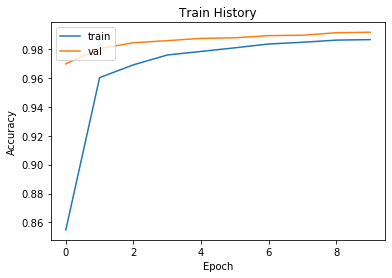

In [62]:
show_train_history('accuracy','val_accuracy')

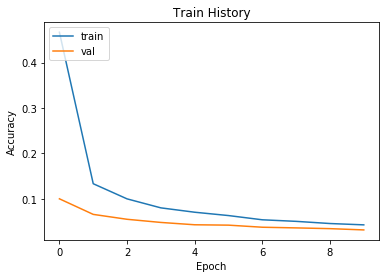

In [63]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [40]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
print("Accuracy=", scores[1]) 

10000/10000 [==============================] - 2s 246us/step
Accuracy= 0.9918000102043152


# 預測結果

In [47]:
prediction=model.predict_classes(x_Test4D_normalize)

In [48]:
print(prediction[:10]) 

[7 2 1 0 4 1 4 9 5 9]


In [51]:
print(y_Test[:10]) 

[7 2 1 0 4 1 4 9 5 9]


# 查看預測結果

# confusion matrix

In [54]:
import pandas as pd
pd.crosstab(y_Test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,0,0,0,0,2,1,2,0
1,0,1127,1,0,0,1,1,1,4,0
2,2,1,1027,0,0,0,0,1,1,0
3,0,0,2,1002,0,3,0,1,2,0
4,0,0,0,0,979,0,1,0,0,2
5,1,0,1,2,0,884,4,0,0,0
6,4,2,0,0,1,1,950,0,0,0
7,0,2,7,0,0,0,0,1017,1,1
8,2,0,0,1,0,0,0,1,969,1
